In [1]:
%config Completer.use_jedi = False                                       
import warnings                                                             
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd                                                         
import matplotlib.pyplot as plt                                            
import matplotlib as mpl                                                    
mpl.rcParams['axes.unicode_minus'] = False                                  
#plt.rcParams('font.family') = 'RIDIBatang'                          
#plt.rcParams('font.size') = 16                                             
import matplotlib.font_manager as fm
font = 'C:\\Windows\\Fonts\\RIDIBatang.otf'
fontprop = fm.FontProperties(fname=font, size=16).get_name()
plt.rc('font', family = 'RIDIBatang')
plt.rc('font', size = 16)
import seaborn as sns                                                       
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Scikit-learn이 제공하는 MNIST 손글씨 데이터를 불러오기 위해 import 한다.
from sklearn.datasets import load_digits
#kNN 분류기; 최근접 이웃
from sklearn.neighbors import KNeighborsClassifier
#서포트 벡터 머신
from sklearn.svm import SVC
#의사결정 트리
from sklearn.tree import DecisionTreeClassifier

In [3]:
mnist = load_digits() #Scikit-learn이 제공하는 손글씨 데이터를 불러온다.
feature, label = mnist.data, mnist.target
print(feature.shape, label.shape)

(1797, 64) (1797,)


***
학습 데이터와 테스트 데이터를 나눈다.
***

In [4]:
x_train, x_test, x_train_label, x_test_label = train_test_split(mnist.data, mnist.target, train_size=0.8)
print('학습 데이터 갯수 : {}, 테스트 데이터 갯수 : {}'.format(x_train.shape[0], x_test.shape[0]))

학습 데이터 갯수 : 1437, 테스트 데이터 갯수 : 360


***
단일 모델의 정확도 측정
***
앙상블 정확도를 측정하기에 앞서 단일 모델들의 정확도를 kNN, SVM, 의사결정 트리 분류기를 만들어 정확도를 계산한다.

In [5]:
#kNN
knn = KNeighborsClassifier(n_neighbors=299).fit(x_train, x_train_label) # 모델 생성 및 학습
knn_predict = knn.predict(x_test) # 예측; x_text -> x_test_label
knn_accuracy = accuracy_score(x_test_label, knn_predict) #정확도
print('kNN의 정확도 : {:6.2%}'.format(knn_accuracy))

kNN의 정확도 : 87.50%


In [6]:
#SVM
svm = SVC(C=0.1, gamma=0.003, probability=True).fit(x_train, x_train_label) # 모델 생성 및 학습
svm_predict = svm.predict(x_test) # 예측; x_text -> x_test_label
svm_accuracy = accuracy_score(x_test_label, svm_predict) #정확도
print('SVM의 정확도 : {:6.2%}'.format(svm_accuracy))

SVM의 정확도 : 91.39%


In [7]:
#의사결정 트리
dt = DecisionTreeClassifier(max_depth=8).fit(x_train, x_train_label) # 모델 생성 및 학습
dt_predict = dt.predict(x_test) # 예측; x_text -> x_test_label
dt_accuracy = accuracy_score(x_test_label, dt_predict) #정확도
print('의사결정 트리 의 정확도 : {:6.2%}'.format(dt_accuracy))

의사결정 트리 의 정확도 : 85.00%


***
하드 보팅
***
일반적인 투표와 같이 각 분류기의 예측값들을 모아 가장 많은 투표를 받은 예측값으로 최종 결론을 내린다.

In [8]:
#하드, 소프트 보팅을 계산하기 위해 import 한다.
from sklearn.ensemble import VotingClassifier

In [9]:
hv_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dt)],
                          weights=[1, 1, 1], voting='hard').fit(x_train, x_train_label) # 모델 생성 및 학습
hv_clf_predict = hv_clf.predict(x_test) # 예측; x_text -> x_test_label
hv_clf_accuracy = accuracy_score(x_test_label, hv_clf_predict) #정확도
print('하드보팅의 정확도 : {:6.2%}'.format(hv_clf_accuracy))

하드보팅의 정확도 : 93.33%


***
소프트 보팅
***
각 분류별 확률을 더해준 값을 점수로 사용해 최대 점수를 가진 분류값으로 결론을 내린다.

***
확률 합계
***

In [10]:
# predict_proba() 메소드로 분류 모델이 각 레이블의 확률을 계산한다.
knn_proba = knn.predict_proba(x_test)
#print(knn_proba)
print(knn_proba[0])
print('확률 합계 -> {:6.2%}'.format(knn_proba[0].sum()))

[0.26421405 0.06020067 0.         0.11036789 0.         0.11705686
 0.         0.         0.11705686 0.33110368]
확률 합계 -> 100.00%


In [11]:
svm_proba = svm.predict_proba(x_test)
#print(svm_proba)
print(svm_proba[0])
print('확률 합계 -> {:6.2%}'.format(svm_proba[0].sum()))

[0.01294509 0.03248769 0.01794538 0.0305163  0.00943004 0.06028118
 0.00834853 0.01778974 0.12112216 0.68913389]
확률 합계 -> 100.00%


In [12]:
dt_proba = dt.predict_proba(x_test)
#print(dt_proba)
print(dt_proba[0])
print('확률 합계 -> {:6.2%}'.format(dt_proba[0].sum()))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
확률 합계 -> 100.00%


In [13]:
sv_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dt)],
                          weights=[1, 1, 1], voting='soft').fit(x_train, x_train_label) # 모델 생성 및 학습
sv_clf_predict = sv_clf.predict(x_test) # 예측; x_text -> x_test_label
sv_clf_accuracy = accuracy_score(x_test_label, sv_clf_predict) #정확도
print('소프트보팅의 정확도 : {:6.2%}'.format(sv_clf_accuracy))

소프트보팅의 정확도 : 91.94%


***
단일 모델과 앙상블 모델의 정확도 비교 시각화
***

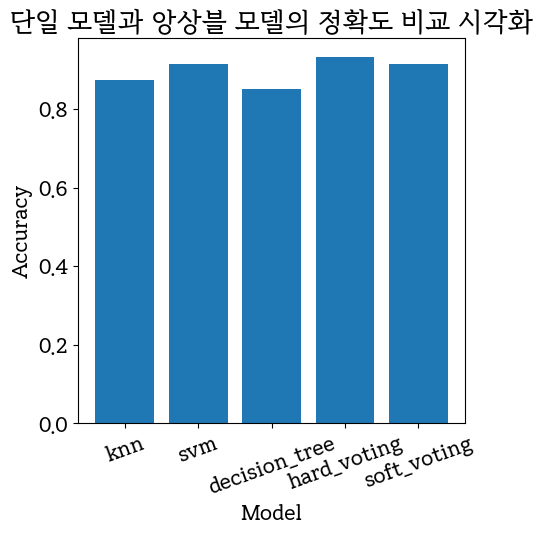

In [21]:
plt.figure(figsize=[5, 5])
x = np.arange(5)
plt.bar(x, height=[accuracy_score(x_test_label, knn_predict)
                   , accuracy_score(x_test_label, svm_predict)
                   , accuracy_score(x_test_label, dt_predict)
                   , accuracy_score(x_test_label, hv_clf_predict)
                   , accuracy_score(x_test_label, svm_predict)] )
plt.xticks(x, ['knn', 'svm', 'decision_tree', 'hard_voting', 'soft_voting'], rotation=20)
plt.title('단일 모델과 앙상블 모델의 정확도 비교 시각화')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()